In [1]:
import pandas as pd

In [27]:
df_match = pd.read_csv("df_diuretic_responsitive_match.csv")
df_match = df_match[["stay_id","label_diu_res","groupHPD"]]
df_match.label_diu_res.value_counts()

No diuretic       525
responsive        422
Non-responsive    390
Name: label_diu_res, dtype: int64

In [34]:
df_lifesupport = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_mimic/treatment//mimic_lifesupport.csv")
df_lifesupport = pd.merge(df_lifesupport,df_match,how="right",on="stay_id")
df_lifesupport = df_lifesupport.fillna(0)
df_lifesupport.head(2)

,stay_id,is_vaso,is_mv,is_rrt,is_crrt,label_diu_res,groupHPD
0,30008792,0.0,1.0,0.0,0.0,Non-responsive,1
1,30020923,0.0,1.0,0.0,0.0,No diuretic,1


In [35]:
df_lifesupport = df_lifesupport.groupby(["groupHPD","label_diu_res"]).agg({'is_vaso':'sum','is_mv':'sum','is_rrt':'sum','is_crrt':'sum',"stay_id":'count'}).reset_index()
df_lifesupport

,groupHPD,label_diu_res,is_vaso,is_mv,is_rrt,is_crrt,stay_id
0,1,No diuretic,41.0,272.0,12.0,11.0,292
1,1,Non-responsive,28.0,142.0,10.0,10.0,144
2,1,responsive,47.0,214.0,4.0,4.0,217
3,2,No diuretic,9.0,168.0,0.0,0.0,182
4,2,Non-responsive,11.0,177.0,2.0,1.0,182
5,2,responsive,11.0,160.0,0.0,0.0,161
6,3,No diuretic,27.0,47.0,12.0,11.0,51
7,3,Non-responsive,27.0,64.0,26.0,25.0,64
8,3,responsive,20.0,43.0,8.0,7.0,44


In [71]:
df_lifesupport_p = df_lifesupport
df_lifesupport_p["is_vaso_p"] = df_lifesupport_p["is_vaso"]/ df_lifesupport_p["stay_id"] * 100
df_lifesupport_p["is_mv_p"] = df_lifesupport_p["is_mv"]/ df_lifesupport_p["stay_id"] * 100
df_lifesupport_p["is_rrt_p"] = df_lifesupport_p["is_rrt"]/ df_lifesupport_p["stay_id"] * 100
df_lifesupport_p["is_crrt_p"] = df_lifesupport_p["is_crrt"]/ df_lifesupport_p["stay_id"] * 100
df_lifesupport_p

,groupHPD,label_diu_res,is_vaso,is_mv,is_rrt,is_crrt,stay_id,is_vaso_p,is_mv_p,is_rrt_p,is_crrt_p
0,1,No diuretic,41.0,272.0,12.0,11.0,292,14.041096,93.150685,4.109589,3.767123
1,1,Non-responsive,28.0,142.0,10.0,10.0,144,19.444444,98.611111,6.944444,6.944444
2,1,responsive,47.0,214.0,4.0,4.0,217,21.658986,98.617512,1.843318,1.843318
3,2,No diuretic,9.0,168.0,0.0,0.0,182,4.945055,92.307692,0.000000,0.000000
4,2,Non-responsive,11.0,177.0,2.0,1.0,182,6.043956,97.252747,1.098901,0.549451
5,2,responsive,11.0,160.0,0.0,0.0,161,6.832298,99.378882,0.000000,0.000000
6,3,No diuretic,27.0,47.0,12.0,11.0,51,52.941176,92.156863,23.529412,21.568627
7,3,Non-responsive,27.0,64.0,26.0,25.0,64,42.187500,100.000000,40.625000,39.062500
8,3,responsive,20.0,43.0,8.0,7.0,44,45.454545,97.727273,18.181818,15.909091


In [104]:
def plot_treatmentstat(c):
    import matplotlib.pyplot as plt
    import numpy as np
    size = 14
    titsize = 14
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, sharex=True,
                                        figsize=(4,4))
    ax0.set_title('Renal replacement therapy',fontsize=titsize)
    ax0.bar(df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["label_diu_res"].tolist(), df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["is_rrt_p"].tolist(),
            width=0.3,color=("#f8746a" ,"#74a8ff","#3fc968"), edgecolor='black')

    ax1.set_title('Mechanical ventilation',fontsize=titsize)
    ax1.bar(df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["label_diu_res"].tolist(), df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["is_mv_p"].tolist(),
            width=0.3,color=("#f8746a" ,"#74a8ff","#3fc968"), edgecolor='black' )

    ax2.set_title('Vasopressor',fontsize=titsize)
    ax2.bar(df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["label_diu_res"].tolist(), df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["is_vaso_p"].tolist(),
            width=0.3,color=("#f8746a" ,"#74a8ff","#3fc968") , edgecolor='black')

    ax1.set_ylabel("Percentage (%)",fontsize=size)
    ax2.tick_params(axis='x', labelrotation=10, labelsize=size)
    ax2.tick_params(axis='y', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax0.tick_params(axis='y', labelsize=12)
    
    ax0.set_ylim(0, 45)
    ax1.set_ylim(0, 100)
    ax2.set_ylim(0, 100)
    plt.tight_layout()
    tit = "mimic_other_treatment_stat_C" + str(c) + ".pdf"
    plt.savefig(tit, bbox_inches = 'tight')
    plt.show()

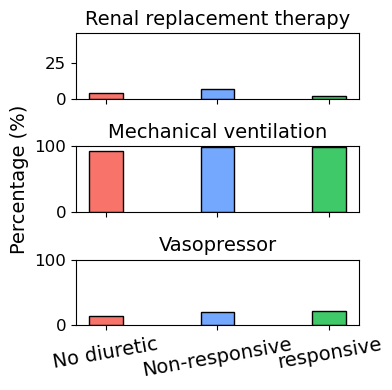

In [105]:
c = 1
plot_treatmentstat(c)

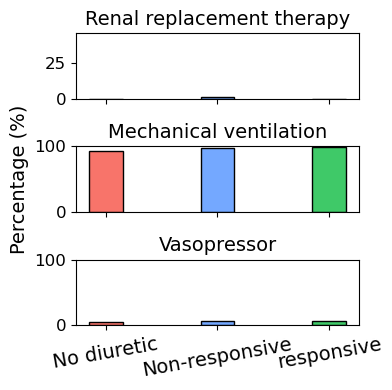

In [106]:
c = 2
plot_treatmentstat(c)

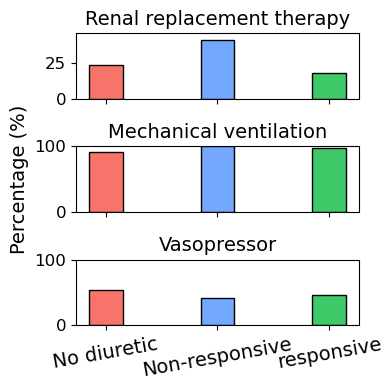

In [107]:
c = 3
plot_treatmentstat(c)